In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0-dev20211025


In [2]:
# Importing dataset from sklearn library.
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
# Learning target names
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
# Splitting data for test and train
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size= 0.3, random_state= 0)

In [6]:
print(f"Size of x train is {X_train.shape[0]} and size of x test is {X_test.shape[0]} .")

Size of x train is 398 and size of x test is 171 .


In [7]:
R, C = data.data.shape # R for rows and C for columns.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# Scaling process for better fitting.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from keras.layers import Dense
from keras.models import Sequential

In [11]:
model = Sequential()

model.add(Dense(7, input_shape= (C,), activation= "relu"))
model.add(Dense(1, activation= "sigmoid"))
model.compile(optimizer="adam", loss= "binary_crossentropy", metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 13ms/step - loss: 0.6466 - accuracy: 0.5201 - val_loss: 0.6130 - val_accuracy: 0.5497
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5586 - accuracy: 0.5980 - val_loss: 0.5331 - val_accuracy: 0.7018
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4871 - accuracy: 0.7111 - val_loss: 0.4652 - val_accuracy: 0.7953
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.8467 - val_loss: 0.4070 - val_accuracy: 0.8713
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3689 - accuracy: 0.9045 - val_loss: 0.3568 - val_accuracy: 0.9006
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.9347 - val_loss: 0.3157 - val_accuracy: 0.9181
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2794 - accuracy: 0.9472 - val_loss: 0.2802 - val_accuracy: 0.9240
Epoch 8/100


Epoch 59/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9899 - val_loss: 0.0940 - val_accuracy: 0.9649
Epoch 60/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9899 - val_loss: 0.0939 - val_accuracy: 0.9649
Epoch 61/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9899 - val_loss: 0.0938 - val_accuracy: 0.9649
Epoch 62/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9899 - val_loss: 0.0933 - val_accuracy: 0.9649
Epoch 63/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9899 - val_loss: 0.0934 - val_accuracy: 0.9649
Epoch 64/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9899 - val_loss: 0.0934 - val_accuracy: 0.9649
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9899 - val_loss: 0.0934 - val_accuracy: 0.9649
Epoch 

<function matplotlib.pyplot.legend(*args, **kwargs)>

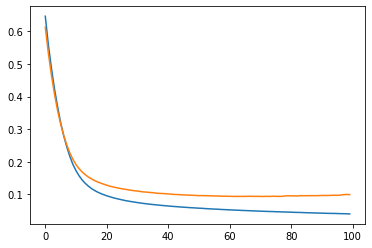

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(r.history["loss"], label= "loss")
plt.plot(r.history["val_loss"], label= "val_loss")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

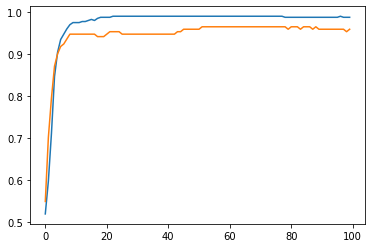

In [13]:
plt.plot(r.history["accuracy"], label= "accuracy")
plt.plot(r.history["val_accuracy"], label= "val_accuracy")
plt.legend

In [14]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0.9874
Train score: [0.03932489827275276, 0.9874371886253357]
6/6 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 0.9591
Test score: [0.09898717701435089, 0.9590643048286438]


In [15]:
# creating a confusion matrix to evaluate our predict
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[ 60   3]
 [  4 104]]


In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train)
y_pred2 = mlp.predict(X_test)

In [17]:
conf2 = confusion_matrix(y_pred2, y_test)
print(conf2)

[[ 60   3]
 [  3 105]]
